In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats

In [3]:
df = pd.read_csv("Machine1.csv")
df.head()

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58


In [4]:
df.describe()

,Machine 1
count,100.000000
mean,150.203100
std,2.018812
min,145.550000
25%,148.717500
50%,150.285000
75%,151.502500
max,154.550000


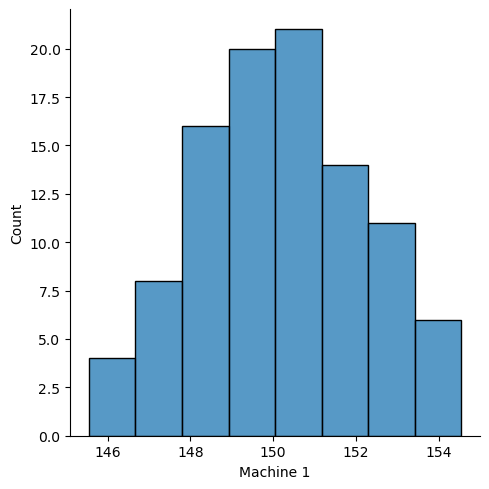

In [6]:
sns.displot(x = "Machine 1", data = df)

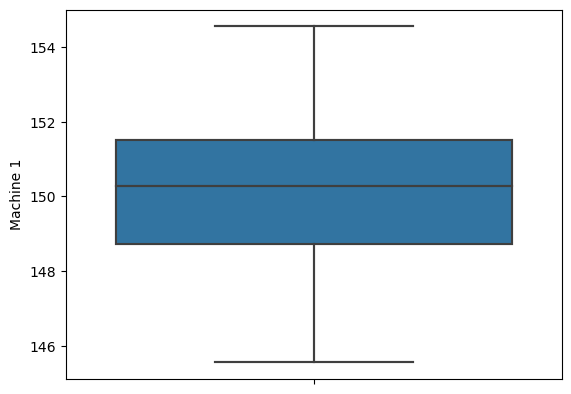

In [11]:
sns.boxplot(y = "Machine 1", data = df)
plt.show()

# One sample test

### One sample Z-test

In [18]:
# Two-sided
statistic = weightstats.ztest(x1 = df["Machine 1"],
                  value = 150,
                  alternative='two-sided')

print(f'Zcalculated: {statistic[0]} and p-value: {statistic[1]}')

Zcalculated: 1.0060370247722599 and p-value: 0.3143977600779597


In [24]:
# One-sided

statistic = weightstats.ztest(x1 = df["Machine 1"],
                  value = 150,
                  alternative='larger')

print(f'Zcalculated: {statistic[0]} and p-value: {statistic[1]}')

Zcalculated: 1.0060370247722599 and p-value: 0.15719888003897986


### t-Test

* As sample size is large (100) thus it is ok to perform also t-Testm
* As sample size increases the sampling distribution approaches normal distribution

In [20]:
stats.ttest_1samp(df["Machine 1"], 150)

Ttest_1sampResult(statistic=1.0060370247722599, pvalue=0.3168503751206756)

### One sample t-test using python

Example:

Perfume bottle producing 150cc, 4 bottles are randomly picked and the average volume was found to be 151 cc and sd of the sample bottles was 2cc. Has the volume changed? (95% confidence)

In [27]:
volumes = pd.Series([148.5, 153.4, 150.9, 151.2])
volumes


0    148.5
1    153.4
2    150.9
3    151.2
dtype: float64

In [28]:
volumes.describe

<bound method NDFrame.describe of 0    148.5
1    153.4
2    150.9
3    151.2
dtype: float64>

In [29]:
stats.ttest_1samp(volumes, 150)

# Failed to reject null hypothesis
# There was not enough evidance to reject null hypothesis

Ttest_1sampResult(statistic=0.997509336107632, pvalue=0.3920333832606524)

### One proportion Test

Example: Smoking rate in a town in the past was 21%, 100 samples were picked and found 14 smokers. Hasthe smoking habit changed? (95% confidence).

In [32]:
# test probability of sucess is p = 0.21 (two-sided)
stats.binom_test(14, 100, p = 0.21, alternative='two-sided')
# returns p-value 0.109
# Failed to reject null hypothesis

0.1092081572082592

In [34]:
# Question 2: Has the smoking habit reduced at 95 CI

stats.binom_test(14, 100, p = 0.21, alternative='less')
# returns p-value 0.0504
# Failed to reject null hypothesis


0.0504246022155211

In [35]:
# Testing using real table data

df = pd.read_csv("Smokers.csv")
df.head()

,Name,Smokers
0,Person 1,No
1,Person 2,No
2,Person 3,No
3,Person 4,Yes
4,Person 5,No


In [45]:
smk = df.groupby('Smokers').count()
smk

,Name
Smokers,
No,86
Yes,14


In [46]:
# Put Yes in first row
smk = smk.reindex(["Yes", "No"])
smk

,Name
Smokers,
Yes,14
No,86


In [47]:
stats.binom_test(smk, p = 0.21)

array([0.10920816])

### One variance test using python

* Example: A sample of 51 bottles was selected. The standatd deviation of these bottles was 2.35cc. Has it increased from the estublished 2cc? 90% Confidence level


$$\chi^2 = \frac{(n-1)s^2}{sigma^2}$$

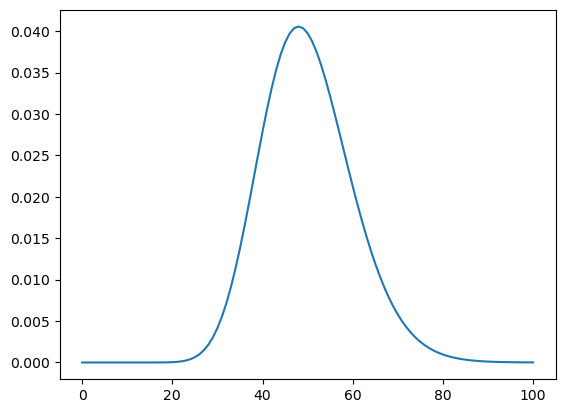

In [55]:
x_ax = np.linspace(0, 100, 101)
y_ax = stats.chi2.pdf(x_ax, df=50)

sns.lineplot(x = x_ax,
            y = y_ax)
plt.show()

In [ ]:
# Lets compute out problem

In [56]:
Chi_sq_cal = (51-1)*(2.35**2)/(2**2)
Chi_sq_cal

69.03125000000001

In [60]:
# alpha = 0.10
# here in isf we provide area on right side i.e. rejection region
# the area is here alpha = 0.10
# it will return us the critical chi2

Chi_sq_critical = stats.chi2.isf(0.10, df = 50)
Chi_sq_critical

63.167121005726315

In [61]:
Chi_sq_cal = (51-1)*(2.35**2)/(2**2)
Chi_sq_critical = stats.chi2.isf(0.10, df = 50)


if Chi_sq_cal > Chi_sq_critical:
    print("Reject Null Hypothesis")
else:
    print("Failed to Reject Null Hypothesis")

Reject Null Hypothesis
